# Objective

**Day 3 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 3. historical**

Used Dataset: [Historical weather in the Netherlands 1901-2018](https://www.kaggle.com/sinaasappel/historical-weather-in-the-netherlands-19012018)

# Setup

In [311]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_style("whitegrid")

# Read Data

In [312]:
df_kmnf = pd.read_csv("../data/KNMI_20181231.csv")
df_stations = pd.read_csv("../data/knmi_stations_2018.csv")

/home/frauke/anaconda3/envs/30env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [313]:
df_kmnf.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,209,20010130,,,,,,,,,...,,,,,,,,,,
1,209,20010131,,,,,,,,,...,,,,,,,,,,
2,209,20010201,236,13,24,50,8,10,1,90,...,,,,,,,,,,
3,209,20010202,150,46,58,80,9,10,3,100,...,,,,,,,,,,
4,209,20010203,106,65,66,90,8,50,1,120,...,,,,,,,,,,


In [314]:
df_kmnf.tail()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
804093,391,20181227,162,8,10,20,5,0,16,30,...,,,,,87,97,20,69,13,3
804094,391,20181228,229,17,18,30,21,10,1,50,...,,,,,91,98,3,83,17,2
804095,391,20181229,243,38,42,60,15,30,1,110,...,,,,,90,97,4,74,23,1
804096,391,20181230,255,24,26,40,1,20,4,100,...,,,,,89,99,21,78,1,2
804097,391,20181231,267,21,22,40,23,10,7,80,...,,,,,95,99,1,87,22,1


**Column Description:**
    
* STN: identifier of the station, corresponds to the file knmi_stations_2018.csv
* YYYYMMDD: date, YYYY=year, MM=month, DD=day
* DDVEC: vector mean of wind direction (360=North, 90=east, 180=south, 270=west, 0=no wind or variable)
* FHVEC: vector mean wind speed in 0.1 m/s (see also http://www.knmi.nl/kennis-en-datacentrum/achtergrond
* FG: mean wind speed for a whole day in 0.1 m/s
* FHX: highest mean wind speed over one hour (0.1 m/s)
* FHXH: hour when FHX was measured
* FHN: lowest mean wind speed over one hour (0.1 m/s)
* FHNH: hour when FHN was measured
* FXX: highest wind gust (0.1 m/s)
* FXXH: hour when FXX was measured
* TG: lavarage daily temperature in 0.1 degrees celsius
* TN: minimum temperature in 0.1 degrees celsius
* TNH: hour when TN was measured
* TX: maximum temperature in 0.1 degrees celsius
* TXH: hour when TX was measured
* T10N: minimum temperature at 10 cm from ground level in 0.1 degrees celcius 
* T10NH: hour when T10 was measured   
* SQ: sun shine duration (in 0.1 hours)
* SP
* Q: global radiation in J/cm^2
* DR: duration of precipitation (in 0.1 hours) 
* RH: sum of precipitation for one day (in 0.1 mm)  
* RHX
* RHXH: hour when RHX was measured    
* PG
* PX
* PXH: hour when PX was measured  
* PN
* PNH: hour when PN was measured
* VVN
* VVNH: hour when VVN was measured
* VVX
* VVXH: hour when VVX was measured
* NG
* UG
* UX
* UXH: hour when UX was measured
* UN
* UNH: hour when UN was measured  
* EV24: reference crop evapotranspiration (Makkink) (in 0.1 mm)  

**Variables considered:**
* FG: mean wind speed for a whole day in 0.1 m/s
* TG: lavarage daily temperature in 0.1 degrees celsius
* TN: minimum temperature in 0.1 degrees celsius
* TNH: hour when TN was measured
* TX: maximum temperature in 0.1 degrees celsius
* TXH: hour when TX was measured
* SQ: sun shine duration (in 0.1 hours)
* Q: global radiation in J/cm^2
* DR: duration of precipitation (in 0.1 hours) 
* RH: sum of precipitation for one day (in 0.1 mm)

In [315]:

columns = ['STN', 'YYYYMMDD','   FG','   TG', '   TN', '  TNH', '   TX', '  TXH',
            '   SQ', '    Q', '   DR', '   RH']
df_kmnf = df_kmnf[columns]
df_kmnf = df_kmnf.rename(columns={'   FG': 'mean_w','   TG': 'T', '   TN': 'T_min', '  TNH': 'TNH', '   TX': 'T_max', '  TXH': 'TXH',
            '   SQ': 'S', '    Q': 'R', '   DR': 'P_duration', '   RH': 'P_sum'})
df_kmnf.head()

,STN,YYYYMMDD,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
0,209,20010130,,,,,,,,,,
1,209,20010131,,,,,,,,,,
2,209,20010201,24,,,,,,,,,
3,209,20010202,58,,,,,,,,,
4,209,20010203,66,,,,,,,,,


In [316]:
df_kmnf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804098 entries, 0 to 804097
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   STN         804098 non-null  int64 
 1   YYYYMMDD    804098 non-null  int64 
 2   mean_w      804098 non-null  object
 3   T           804098 non-null  object
 4   T_min       804098 non-null  object
 5   TNH         804098 non-null  object
 6   T_max       804098 non-null  object
 7   TXH         804098 non-null  object
 8   S           804098 non-null  object
 9   R           804098 non-null  object
 10  P_duration  804098 non-null  object
 11  P_sum       804098 non-null  object
dtypes: int64(2), object(10)
memory usage: 73.6+ MB


In [317]:
df_kmnf['mean_w'][0]

'     '

The dataframe has no missing data, but empy strings. Replace empty strings with nan

In [318]:
df_kmnf.replace(to_replace='     ', value=np.nan, inplace=True)

In [319]:
df_kmnf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804098 entries, 0 to 804097
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   STN         804098 non-null  int64 
 1   YYYYMMDD    804098 non-null  int64 
 2   mean_w      785034 non-null  object
 3   T           651582 non-null  object
 4   T_min       649020 non-null  object
 5   TNH         565281 non-null  object
 6   T_max       649062 non-null  object
 7   TXH         565323 non-null  object
 8   S           548600 non-null  object
 9   R           380651 non-null  object
 10  P_duration  437641 non-null  object
 11  P_sum       452719 non-null  object
dtypes: int64(2), object(10)
memory usage: 73.6+ MB


In [320]:
df_stations.head()

,STN ;LON ;LAT;ALT;NAME
0,209;4.518;52.465;0.00 ;IJMOND
1,210;4.430;52.171;-0.20 ; VALKENBURG
2,215;4.437;52.141;-1.10 ; VOORSCHOTEN
3,225;4.555;52.463; 4.40 ; IJMUIDEN
4,235;4.781;52.928; 1.20 ; DE KOOY


In [321]:
df_stations.tail()

,STN ;LON ;LAT;ALT;NAME
45,370;5.377;51.451;22.60 ; EINDHOVEN
46,375;5.707;51.659;22.00 ; VOLKEL
47,377;5.763;51.198;30.00 ; ELL
48,380;5.762;50.906;114.30 ; MAASTRICHT
49,391;6.197;51.498;19.50 ; ARCEN


In [322]:
# wich station? 
df_kmnf["STN"].unique()

array([209, 210, 215, 225, 235, 240, 242, 248, 249, 251, 257, 258, 260,
       265, 267, 269, 270, 273, 275, 277, 278, 279, 280, 283, 285, 286,
       290, 308, 310, 311, 312, 313, 315, 316, 319, 323, 324, 330, 331,
       340, 343, 344, 348, 350, 356, 370, 375, 377, 380, 391])

In [323]:
# Only Consider De Bilt(Nr.260)
df_kmnf = df_kmnf[df_kmnf["STN"]==260]
df_kmnf.head()

,STN,YYYYMMDD,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
160522,260,19010101,NaN,-49,-65,NaN,-24,NaN,28,NaN,NaN,NaN
160523,260,19010102,NaN,-18,-33,NaN,-14,NaN,0,NaN,NaN,NaN
160524,260,19010103,NaN,-26,-76,NaN,-6,NaN,0,NaN,NaN,NaN
160525,260,19010104,NaN,-65,-90,NaN,-11,NaN,0,NaN,NaN,NaN
160526,260,19010105,NaN,-60,-82,NaN,-20,NaN,36,NaN,NaN,NaN


In [324]:
# order by date and use date as index
df_kmnf.sort_values(by='YYYYMMDD', inplace=True)
#df_kmnf.set_index('YYYYMMDD', drop=True, inplace = True)

In [325]:
columns = ['mean_w','T', 'T_min', 'TNH', 'T_max', 'TXH', 'S', 'R', 'P_duration', 'P_sum']
for col in columns:
    df_kmnf[col] = pd.to_numeric(df_kmnf[col], errors='coerce')
    if col not in ['YYYYMMDD', 'STN']:
        df_kmnf[col] = df_kmnf[col].multiply(.1) #change units to °C etc.
df_kmnf.head(100)

,STN,YYYYMMDD,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
160522,260,19010101,NaN,-4.9,-6.5,NaN,-2.4,NaN,2.8,NaN,NaN,NaN
160523,260,19010102,NaN,-1.8,-3.3,NaN,-1.4,NaN,0.0,NaN,NaN,NaN
160524,260,19010103,NaN,-2.6,-7.6,NaN,-0.6,NaN,0.0,NaN,NaN,NaN
160525,260,19010104,NaN,-6.5,-9.0,NaN,-1.1,NaN,0.0,NaN,NaN,NaN
160526,260,19010105,NaN,-6.0,-8.2,NaN,-2.0,NaN,3.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
160617,260,19010406,NaN,6.2,-1.8,NaN,10.7,NaN,1.6,NaN,NaN,NaN
160618,260,19010407,NaN,9.7,7.0,NaN,11.8,NaN,0.1,NaN,NaN,NaN
160619,260,19010408,NaN,10.3,5.4,NaN,13.6,NaN,7.8,NaN,NaN,NaN
160620,260,19010409,NaN,9.7,6.6,NaN,12.7,NaN,6.6,NaN,NaN,NaN


In [326]:
df_kmnf.tail()

,STN,YYYYMMDD,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
203616,260,20181227,1.2,0.8,-2.7,2.4,4.8,1.5,2.1,24.3,0.0,0.0
203617,260,20181228,1.6,2.3,-3.1,0.2,5.4,2.4,0.0,4.6,0.0,0.0
203618,260,20181229,4.5,7.9,5.4,0.1,10.9,1.8,0.0,5.7,1.1,0.4
203619,260,20181230,2.6,8.5,6.2,0.8,9.5,2.3,0.0,11.2,4.8,1.0
203620,260,20181231,2.7,8.9,7.7,2.2,10.0,1.4,0.3,13.7,0.7,0.1


# Data Preparation

* Calculate monthly means (for sake of simplicity only if all of data available)
* Calculate seasonal and yearly means

In [327]:
# dataset has different number of measurements per month/ day
# calculate mean over days
df_kmnf["YYYYMMDD"] = pd.to_datetime(df_kmnf['YYYYMMDD'], format='%Y%m%d')
df_kmnf["STN"] = df_kmnf["STN"].astype(int)
df_kmnf = df_kmnf.resample('d', on='YYYYMMDD').mean().dropna(how='all')

In [328]:
df_kmnf.head()

,STN,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
YYYYMMDD,,,,,,,,,,,
1901-01-01,260,NaN,-4.9,-6.5,NaN,-2.4,NaN,2.8,NaN,NaN,NaN
1901-01-02,260,NaN,-1.8,-3.3,NaN,-1.4,NaN,0.0,NaN,NaN,NaN
1901-01-03,260,NaN,-2.6,-7.6,NaN,-0.6,NaN,0.0,NaN,NaN,NaN
1901-01-04,260,NaN,-6.5,-9.0,NaN,-1.1,NaN,0.0,NaN,NaN,NaN
1901-01-05,260,NaN,-6.0,-8.2,NaN,-2.0,NaN,3.6,NaN,NaN,NaN


In [329]:
df_kmnf['YYYYMMDD'] = df_kmnf.index
df_kmnf = df_kmnf.resample('m', on='YYYYMMDD').mean().dropna(how='all')

In [330]:
df_kmnf.head()

,STN,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
YYYYMMDD,,,,,,,,,,,
1901-01-31,260,NaN,-0.258065,-3.119355,NaN,3.090323,NaN,2.096774,NaN,NaN,NaN
1901-02-28,260,NaN,-0.860714,-4.078571,NaN,1.939286,NaN,2.135714,NaN,NaN,NaN
1901-03-31,260,NaN,3.506452,0.983871,NaN,6.554839,NaN,2.229032,NaN,NaN,NaN
1901-04-30,260,NaN,9.030000,4.276667,NaN,13.490000,NaN,5.836667,NaN,NaN,NaN
1901-05-31,260,NaN,11.987097,6.345161,NaN,17.477419,NaN,7.387097,NaN,NaN,NaN


In [331]:
df_kmnf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1416 entries, 1901-01-31 to 2018-12-31
Freq: M
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         1416 non-null   int64  
 1   mean_w      1379 non-null   float64
 2   T           1416 non-null   float64
 3   T_min       1416 non-null   float64
 4   TNH         816 non-null    float64
 5   T_max       1416 non-null   float64
 6   TXH         816 non-null    float64
 7   S           1415 non-null   float64
 8   R           738 non-null    float64
 9   P_duration  1067 non-null   float64
 10  P_sum       1355 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 132.8 KB


In [332]:
df_kmnf = df_kmnf.resample('Q-NOV').mean().dropna(how='all')

In [333]:
df_kmnf.head()

,STN,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
YYYYMMDD,,,,,,,,,,,
1901-02-28,260,NaN,-0.559389,-3.598963,NaN,2.514804,NaN,2.116244,NaN,NaN,NaN
1901-05-31,260,NaN,8.174516,3.868566,NaN,12.507419,NaN,5.150932,NaN,NaN,NaN
1901-08-31,260,NaN,16.218853,10.450932,NaN,21.475412,NaN,7.072186,NaN,NaN,NaN
1901-11-30,260,NaN,9.893047,5.439319,NaN,14.259247,NaN,3.308566,NaN,NaN,NaN
1902-02-28,260,NaN,2.441590,-0.410484,NaN,5.178034,NaN,1.942934,NaN,NaN,NaN


In [334]:
# drop first and last entry, because they are not complete
df_kmnf = df_kmnf[1:-1]
df_kmnf.head()

,STN,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
YYYYMMDD,,,,,,,,,,,
1901-05-31,260,NaN,8.174516,3.868566,NaN,12.507419,NaN,5.150932,NaN,NaN,NaN
1901-08-31,260,NaN,16.218853,10.450932,NaN,21.475412,NaN,7.072186,NaN,NaN,NaN
1901-11-30,260,NaN,9.893047,5.439319,NaN,14.259247,NaN,3.308566,NaN,NaN,NaN
1902-02-28,260,NaN,2.441590,-0.410484,NaN,5.178034,NaN,1.942934,NaN,NaN,NaN
1902-05-31,260,NaN,7.654480,3.356703,NaN,12.156452,NaN,4.807168,NaN,NaN,NaN


In [335]:
df_kmnf.tail()

,STN,mean_w,T,T_min,TNH,T_max,TXH,S,R,P_duration,P_sum
YYYYMMDD,,,,,,,,,,,
2017-11-30,260,3.190896,11.427312,7.829677,1.255878,14.940179,1.329534,3.488351,62.620860,2.196201,3.079570
2018-02-28,260,4.017627,3.728456,0.974078,1.207066,6.443164,1.392473,2.668356,33.728994,2.379493,2.886751
2018-05-31,260,3.494588,11.105950,5.654946,0.943011,16.095771,1.371111,6.410108,143.424014,1.466237,1.915448
2018-08-31,260,2.912294,18.901039,12.826523,1.064265,24.151254,1.406416,8.151935,192.572688,0.469355,0.913548
2018-11-30,260,3.088781,11.166201,6.747599,1.235305,15.630215,1.363369,5.012294,76.532545,1.116631,1.228208


# Plots

* Variables to plot: T, T_max, T_min, P_sum

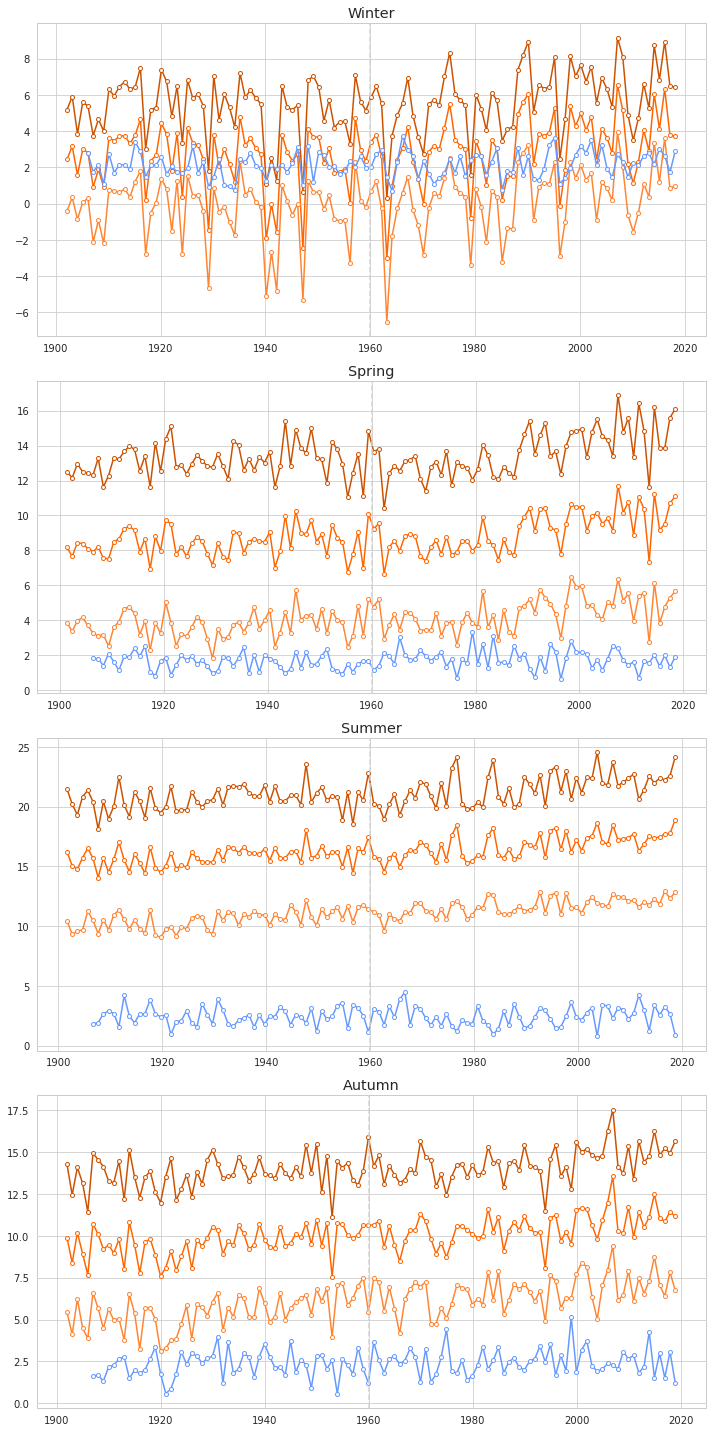

In [363]:
season = ["Winter", "Spring", "Summer", "Autumn"]
time1 = pd.to_datetime('19010101', format='%Y%m%d')
time2 = pd.to_datetime('19600101', format='%Y%m%d')
time3 = pd.to_datetime('20190101', format='%Y%m%d')
fig, axes = plt.subplots(4,1, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    ax.plot(df_kmnf[df_kmnf.index.quarter==i+1]["T"],color='#ff6600', marker='o',
     markerfacecolor='white', markersize=4)
    ax.plot(df_kmnf[df_kmnf.index.quarter==i+1]["T_max"],color='#cc5200', marker='o',
     markerfacecolor='white', markersize=4)
    ax.plot(df_kmnf[df_kmnf.index.quarter==i+1]["T_min"],color='#ff8533', marker='o',
     markerfacecolor='white', markersize=4)
    ax.plot(df_kmnf[df_kmnf.index.quarter==i+1]["P_sum"],color='#6699ff', marker='o',
     markerfacecolor='white', markersize=4)
    ax.axvline(x=time2, ymin=0, ymax=10, color="lightgrey", linestyle='dashed')
    ax.axhline(y=df_winter_19011960['T'], xmin=time1, xmax= time2, color="lightgrey", linestyle='dashed')    
    #ax.set_ylim(-5,25)
    ax.set_title(season[i])
plt.tight_layout()

In [364]:
# mean before 1960 and after 1960
df_summer_19011960 = df_kmnf[df_kmnf.index.quarter==3].loc['1901-11-30':'1960-11-30'].mean()
df_summer_19602015 = df_kmnf[df_kmnf.index.quarter==3].loc['1960-11-30':].mean()

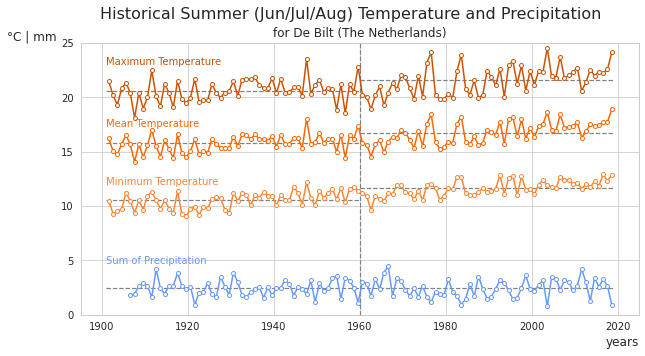

In [406]:
# plot only summer
time0 = pd.to_datetime('18900101', format='%Y%m%d')
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(df_kmnf[df_kmnf.index.quarter==3]["T"],color='#ff6600', marker='o',
           markerfacecolor='white', markersize=4)
ax.plot(df_kmnf[df_kmnf.index.quarter==3]["T_max"],color='#cc5200', marker='o',
           markerfacecolor='white', markersize=4)
ax.plot(df_kmnf[df_kmnf.index.quarter==3]["T_min"],color='#ff8533', marker='o',
           markerfacecolor='white', markersize=4)
ax.plot(df_kmnf[df_kmnf.index.quarter==3]["P_sum"],color='#6699ff', marker='o',
           markerfacecolor='white', markersize=4)

ax.vlines(x=time2, ymin=0, ymax=25, color="grey", linestyle='dashed', linewidth=1.2)
ax.hlines(y=df_summer_19011960['T'], xmin=time1, xmax= time2, color="grey", linestyle='dashed', linewidth=1.2)    
ax.hlines(y=df_summer_19602015['T'], xmin=time2, xmax= time3, color="grey", linestyle='dashed', linewidth=1.2)  
ax.hlines(y=df_summer_19011960['T_max'], xmin=time1, xmax= time2, color="grey", linestyle='dashed', linewidth=1.2)    
ax.hlines(y=df_summer_19602015['T_max'], xmin=time2, xmax= time3, color="grey", linestyle='dashed', linewidth=1.2)  
ax.hlines(y=df_summer_19011960['T_min'], xmin=time1, xmax= time2, color="grey", linestyle='dashed', linewidth=1.2)    
ax.hlines(y=df_summer_19602015['T_min'], xmin=time2, xmax= time3, color="grey", linestyle='dashed', linewidth=1.2)
ax.hlines(y=df_summer_19011960['P_sum'], xmin=time1, xmax= time2, color="grey", linestyle='dashed', linewidth=1.2)    
ax.hlines(y=df_summer_19602015['P_sum'], xmin=time2, xmax= time3, color="grey", linestyle='dashed', linewidth=1.2)  
ax.set_ylim(0,25)
ax.set_ylabel("°C | mm",loc="top",rotation=0)
ax.set_xlabel("years",loc="right")
ax.text(x=time1, y=12, s="Minimum Temperature", color='#ff8533')
ax.text(x=time1, y=17.3, s="Mean Temperature", color='#ff6600')
ax.text(x=time1, y=23, s="Maximum Temperature", color='#cc5200')
ax.text(x=time1, y=4.7, s="Sum of Precipitation", color='#6699ff')

plt.suptitle("Historical Summer (Jun/Jul/Aug) Temperature and Precipitation", fontsize=16)
plt.title("for De Bilt (The Netherlands)", fontsize=12);
plt.savefig("../plots/day3_historical.png")